# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

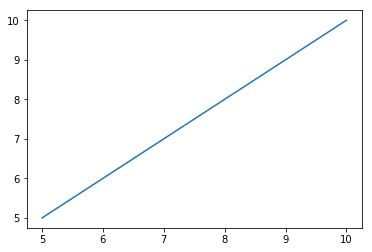

In [1]:
# TODO - your code here

import math
import matplotlib.pyplot as plt
import numpy as np


# Identity Function

def f(x):
    return x


x = np.linspace(5, 10, 50)
y = np.vectorize(f)(x)

plt.plot(x, y)

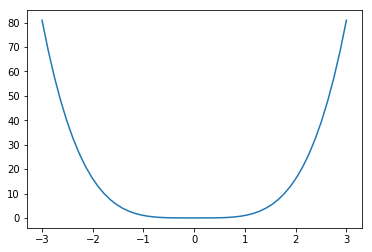

In [4]:
#@title  { run: "auto", form-width: "35%" }
exponent = 4 #@param {type:"slider", min:2, max:5, step:1}

def f(x):
    return x**exponent


x = np.linspace(-3, 3, 50)
y = np.vectorize(f)(x)

plt.plot(x, y)

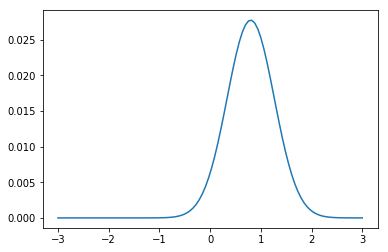

In [0]:
#@title  { run: "auto", form-width: "35%" }
a = 3.75 #@param {type:"slider", min:-5, max:5, step:0.25}
b = 0.7 #@param {type:"slider", min:0, max:1, step:0.1}
c = 3 #@param {type:"slider", min:-5, max:5, step:1}

def f(x):
    return (a * math.e) ** -((x - b) ** 2) / ((2 * c) ** 2)

x = np.linspace(-3, 3, 100)
y = np.vectorize(f)(x)
plt.plot(x, y)

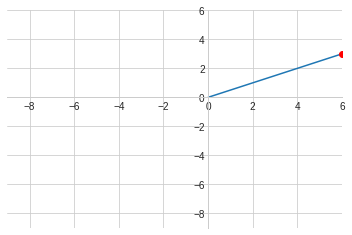

In [0]:
#@title  { run: "auto", form-width: "35%" }
x = 6 #@param {type:"slider", min:0, max:10, step:1}
y = 3 #@param {type:"slider", min:0, max:10, step:1}

xlim = (x + 3)
ylim = (y + 3)
plt.style.use('seaborn-whitegrid')

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.axhline(linewidth=0.5)        # inc. width of x-axis and color it green
ax.axvline(linewidth=0.5)        # inc. width of y-axis and color it red


# plt.xticks(np.linspace(-xlim, xlim, 10, endpoint=True))

plt.plot([0, x], [0, y])
plt.xlim(-xlim, ylim)
plt.ylim(-xlim, ylim)
plt.plot(x, y, 'ro')

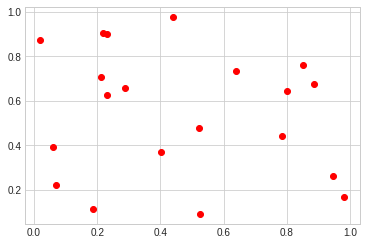

In [0]:
x = np.matrix([np.random.random(20), np.random.random(20)])
plt.plot(x[0, :], x[1, :], 'ro')

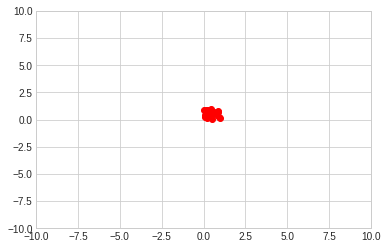

In [0]:
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.plot(x[0, :], x[1, :], 'ro')

Training iter= 0 (w, b, loss):  0.7016991041311604 -0.14005485338497567 57.066700591998604
Training iter= 1 (w, b, loss):  1.5671366687692725 -0.3143515817624035 35.91365055163636
Training iter= 2 (w, b, loss):  1.5497322201833403 -0.4310661681183868 34.44747570396548
Training iter= 3 (w, b, loss):  1.6335241164247627 -0.535979685736915 34.07639514162805
Training iter= 4 (w, b, loss):  1.54242599612729 -0.6361336019186442 32.114658117677834
Training iter= 5 (w, b, loss):  1.2558815940227248 -0.7560983765208095 31.878245812258392
Training iter= 6 (w, b, loss):  1.2416853978647973 -0.8438543323333993 31.1477045693529
Training iter= 7 (w, b, loss):  1.564297139202978 -0.9419363617880439 29.015825507653773
Training iter= 8 (w, b, loss):  1.700101160082871 -1.0377268804807491 29.728588282264464
Training iter= 9 (w, b, loss):  1.6101327274664083 -1.1419376373121184 27.41853131949041
Training iter= 10 (w, b, loss):  1.430906498659504 -1.2349683830394915 25.658240712265393
Training iter= 11 (w

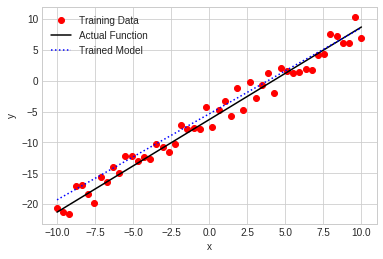

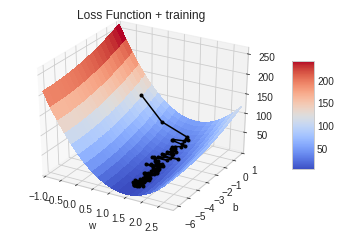

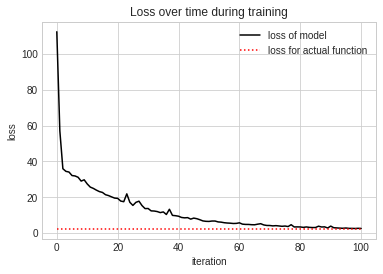

In [0]:
from matplotlib import pyplot as PLT
from matplotlib import cm as CM
import numpy as NP
from mpl_toolkits.mplot3d import Axes3D
from random import random, randrange, sample

FUNC_B, FUNC_W = -6.3, 1.5

def func(x):
    return FUNC_B + FUNC_W * x

def funcWithNoise(x):
    return func(x) + (random()-0.5) * 5.0

def buildTrainingData():
    X = NP.linspace(-10, 10, 50)
    Y = list()
    for x in X:
        Y.append(funcWithNoise(x))
    return X, Y

def lossFunc(w, b, X, Y):
    N = len(X)
    loss = 0.0
    for x, y in zip(X, Y):
        loss += pow(y - (b + w * x), 2)
    loss = loss / float(N)
    return loss

def lossFuncGradient(w, b, X, Y):
    N = len(X)
    dw = 0.0
    db = 0.0
    for x, y in zip(X, Y):
        dw += -2.0 * x * (y - (b + w * x))
        db += -2.0 * (y - (b + w * x))
    dw = dw / float(N)
    db = db / float(N)
    return dw, db

def getSubsample(X, Y, count):
    indexes = sample(range(len(X)), count)

    sampleX, sampleY = list(), list()
    for i in indexes:
        sampleX.append(X[i])
        sampleY.append(Y[i])
    return sampleX, sampleY

def updateWeights(w, b, X, Y, learning_rate, sample_count=None):
    if sample_count is not None:
    # Can comment the below line out if we want to use the entire training dataset for the loss function (more accurate)
        X, Y = getSubsample(X, Y, sample_count)

    dw, db = lossFuncGradient(w, b, X, Y)
    w -= dw * learning_rate
    b -= db * learning_rate
    return w, b

def plotTrainingDataAndModel(X, Y, w, b):
    fig = PLT.figure(2)
    ax = fig.add_subplot(111)

    # Plot training data
    ax.plot(X, Y, 'ro')

    xMin = min(X)
    xMax = max(X)

    # Plot actual function samples taken from
    ax.plot([xMin, xMax], [func(xMin), func(xMax)], 'k-', label="real")

    # Plot trained model
    ax.plot([xMin, xMax], [b + w * xMin, b + w * xMax], 'b:', label="model")

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    PLT.legend(('Training Data', 'Actual Function', 'Trained Model'))

def plotLossFunc(hist_w, hist_b, hist_loss, X, Y):
    # Trying to find a reasonable range for w, b to plot the loss function for
    w_range = min(hist_w)-1, max(hist_w)+1
    b_range = min(hist_b)-1, max(hist_b)+1

    w = NP.linspace(w_range[0], w_range[1], 20)
    b = NP.linspace(b_range[0], b_range[1], 20)
    
    W, B = NP.meshgrid(w, b)
    Z = lossFunc(W, B, X, Y)

    fig = PLT.figure(1)
    ax = fig.add_subplot(111, projection='3d')

    # Plot loss function
    surf = ax.plot_surface(W, B, Z, cmap=CM.coolwarm, linewidth=0, antialiased=False)

    # Plot trained values w, b for each iteration of training
    ax.plot(hist_w, hist_b, hist_loss, 'k.-')

    ax.set_xlim(w_range[0], w_range[1])
    ax.set_ylim(b_range[0], b_range[1])

    ax.set_xlabel("w")
    ax.set_ylabel("b")

    fig.colorbar(surf, shrink=0.5, aspect=5)
    PLT.title("Loss Function + training")

def plotModelLossOverTime(X, Y, hist_loss):
    fig = PLT.figure(3)
    ax = fig.add_subplot(111)

    # Plot loss of our training model as we are training
    ax.plot(list(range(len(hist_loss))), hist_loss, 'k-')

    # Plot loss using actual function used for building training data
    min_loss = lossFunc(FUNC_W, FUNC_B, X, Y)
    ax.plot([0, len(hist_loss)-1], [min_loss, min_loss], 'r:')

    ax.set_xlabel("iteration")
    ax.set_ylabel("loss")
    PLT.title("Loss over time during training")
    PLT.legend(('loss of model', 'loss for actual function'))

if __name__ == '__main__':
    X, Y = buildTrainingData()

    learning_rate = 0.01
    w, b = 0.0, 0.0
    loss = lossFunc(w, b, X, Y)

    hist_w, hist_b, hist_loss = [w], [b], [loss]

    # Begin training
    for i in range(100):
        # Each iteration of training, use the below `sample_count` number of samples from the training
        # data to construct the loss function. If the value is set to `None`, use the entire training
        # data set.
        sample_count = 10
        w, b = updateWeights(w, b, X, Y, learning_rate, sample_count)
        loss = lossFunc(w, b, X, Y)

        print("Training iter=", i, "(w, b, loss): ", w, b, loss)

        hist_w.append(w)
        hist_b.append(b)
        hist_loss.append(loss)

    plotTrainingDataAndModel(X, Y, w, b)
    # Note, this loss function is really the loss function for the entire training dataset, not for the sample count defined above
   
    plotLossFunc(hist_w, hist_b, hist_loss, X, Y) 
    plotModelLossOverTime(X, Y, hist_loss)
    PLT.show()

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.